In [1]:
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import random

Using TensorFlow backend.


In [2]:
def load_photos(directory):
    images = []
    labels_speed = []
    labels_dir = []
    dir_list = listdir(directory)
    random.shuffle(dir_list)
    for name in dir_list:
        filename = directory + '/' + name
        # load an image from file
        image = load_img(filename, target_size=(96, 160))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # get image id + labels
        value_dir = float(name.split('_')[1])
        value_speed = float(name.split('_')[0])
        labels_dir.append(value_dir)
        labels_speed.append(value_speed)
        images.append(image)
    return images, labels_speed, labels_dir

In [7]:
dataset = "../../Auto_3"

In [8]:
# load images from both train and test groups
directory = dataset+'/Train'
images, labels_speed, labels_dir = load_photos(directory)
nb_images = len(images)
print('Loaded Images and labels for training: %d' % nb_images)

Loaded Images and labels for training: 16


In [9]:
#Normalise images
images = np.array(images)
images /= 255.0

In [10]:
#convert datas to dummyvalues
labels_speed = np.array(pd.get_dummies(labels_speed))
labels_dir = np.array(pd.get_dummies(labels_dir))

(array([1], dtype=uint8),
 array([0, 0, 1], dtype=uint8),
 <matplotlib.image.AxesImage at 0x164e222beb8>)

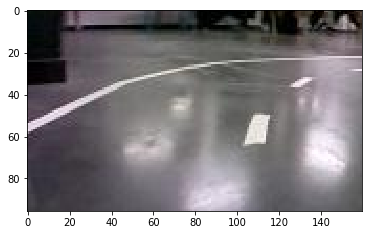

In [11]:
labels_speed[2], labels_dir[2], plt.imshow(images[2])

In [12]:
from keras.models import Model, Sequential
from keras.layers import *
import keras.backend as K
import keras.optimizers as Optimizers
import keras.callbacks

In [13]:
#from keras.models import load_model
#model = load_model("model_bigrace_original_5.h5")

In [14]:
'''
Model from PatateV2
'''

K.clear_session()
############################################################# 

img_in = Input(shape=(96, 160, 3), name='img_in')
x = img_in

x = Convolution2D(2, (5,5), strides=(2,2), use_bias=False)(x)       
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Convolution2D(4, (5,5), strides=(2,2), use_bias=False)(x)       
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.4)(x)
x = Convolution2D(8, (5,5), strides=(2,2), use_bias=False)(x)       
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.5)(x)

x = Flatten(name='flattened')(x)

x = Dense(100, use_bias=False)(x) 
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.4)(x)
x = Dense(50, use_bias=False)(x)  
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.3)(x)

# Multitask Output

out_speed = Dense(2, activation='softmax')(x)

out_dir = Dense(3, activation='softmax')(x)


# Compile Model
model = Model(inputs=[img_in], outputs=[out_speed, out_dir])
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 96, 160, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 78, 2)         150       
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 78, 2)         8         
_________________________________________________________________
activation_1 (Activation)    (None, 46, 78, 2)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 37, 4)         200       
_________________________________________________________________
batch_normalization_2 (Batch (None, 21, 37, 4)         16        
_________________________________________________________________
activation_2 (Activation)    (None, 21, 37, 4)         0   

In [15]:
model_name="model_test.h5"

In [16]:
#save best model if model improved
best_checkpoint = keras.callbacks.ModelCheckpoint(model_name, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [19]:
h = model.fit(images, [labels_speed, labels_dir], batch_size=64, epochs=100, validation_split=0.2, verbose=1, callbacks=[best_checkpoint])

Train on 12 samples, validate on 4 samples
Epoch 1/100
12/12 [==============================] - 0s 3ms/step - loss: 0.9780 - accuracy: 0.5000 - val_loss: 1.1120 - val_accuracy: 0.2500

Epoch 00001: val_loss did not improve from 1.09539
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 1.0490 - accuracy: 0.6667 - val_loss: 1.1156 - val_accuracy: 0.2500

Epoch 00002: val_loss did not improve from 1.09539
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 1.0164 - accuracy: 0.6667 - val_loss: 1.1142 - val_accuracy: 0.2500

Epoch 00003: val_loss did not improve from 1.09539
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.8634 - accuracy: 0.6667 - val_loss: 1.1195 - val_accuracy: 0.2500

Epoch 00004: val_loss did not improve from 1.09539
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.8804 - accuracy: 0.5833 - val_loss: 1.1217 - val_accuracy: 0.2500

Epoch 00005: val_loss did not improve from 


Epoch 00042: val_loss did not improve from 1.09539
Epoch 43/100
12/12 [==============================] - 0s 3ms/step - loss: 0.2476 - accuracy: 1.0000 - val_loss: 1.2488 - val_accuracy: 0.0000e+00

Epoch 00043: val_loss did not improve from 1.09539
Epoch 44/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1913 - accuracy: 1.0000 - val_loss: 1.2554 - val_accuracy: 0.0000e+00

Epoch 00044: val_loss did not improve from 1.09539
Epoch 45/100
12/12 [==============================] - 0s 3ms/step - loss: 0.2798 - accuracy: 1.0000 - val_loss: 1.2581 - val_accuracy: 0.0000e+00

Epoch 00045: val_loss did not improve from 1.09539
Epoch 46/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3398 - accuracy: 0.8333 - val_loss: 1.2623 - val_accuracy: 0.0000e+00

Epoch 00046: val_loss did not improve from 1.09539
Epoch 47/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5125 - accuracy: 0.6667 - val_loss: 1.2669 - val_accuracy: 0.0000e+00

Epoch 000


Epoch 00084: val_loss did not improve from 1.09539
Epoch 85/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1341 - accuracy: 1.0000 - val_loss: 1.4504 - val_accuracy: 0.0000e+00

Epoch 00085: val_loss did not improve from 1.09539
Epoch 86/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0828 - accuracy: 1.0000 - val_loss: 1.4533 - val_accuracy: 0.0000e+00

Epoch 00086: val_loss did not improve from 1.09539
Epoch 87/100
12/12 [==============================] - 0s 3ms/step - loss: 0.2194 - accuracy: 0.9167 - val_loss: 1.4638 - val_accuracy: 0.0000e+00

Epoch 00087: val_loss did not improve from 1.09539
Epoch 88/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1385 - accuracy: 1.0000 - val_loss: 1.4667 - val_accuracy: 0.0000e+00

Epoch 00088: val_loss did not improve from 1.09539
Epoch 89/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1633 - accuracy: 1.0000 - val_loss: 1.4690 - val_accuracy: 0.0000e+00

Epoch 000

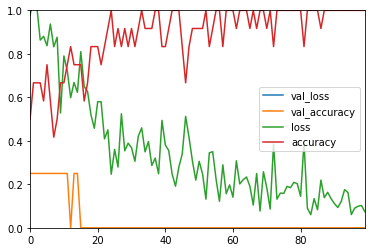

In [20]:
#print History graph
historydf = pd.DataFrame(h.history, index=h.epoch)
historydf.plot(ylim=(0,1))